In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [4]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_mouse_df = pd.merge(clinical_trial_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
clinical_mouse_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [14]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
avg_tumor_volume = clinical_mouse_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
# Convert to DataFrame
avg_tumor_volume_df = pd.DataFrame(avg_tumor_volume).reset_index()
# Preview DataFrame
avg_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [17]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tumor_volume = clinical_mouse_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
# Convert to DataFrame
se_tumor_volume_df = pd.DataFrame(se_tumor_volume).reset_index()
# Preview DataFrame
se_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [45]:
# Minor Data Munging to Re-Format the Data Frames
avg_timepoint_df = avg_tumor_volume_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
avg_timepoint_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [44]:
# Minor Data Munging to Re-Format the Data Frames
se_timepoint_df = se_tumor_volume_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
se_timepoint_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


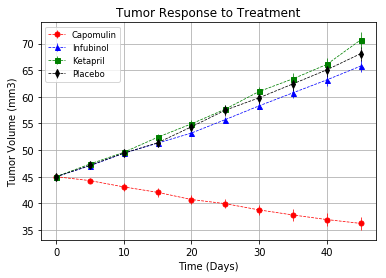

In [46]:
# Generate the Plot (with Error Bars)
plt.errorbar(avg_timepoint_df.index, avg_timepoint_df["Capomulin"], yerr=se_timepoint_df["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.75)
plt.errorbar(avg_timepoint_df.index, avg_timepoint_df["Infubinol"], yerr=se_timepoint_df["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.75)
plt.errorbar(avg_timepoint_df.index, avg_timepoint_df["Ketapril"], yerr=se_timepoint_df["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.75)
plt.errorbar(avg_timepoint_df.index, avg_timepoint_df["Placebo"], yerr=se_timepoint_df["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.75)
#Chart Title
plt.title("Tumor Response to Treatment")
#Set Y Axis Label
plt.ylabel("Tumor Volume (mm3)")
#Set X Axis Label
plt.xlabel("Time (Days)")
#Show Chart Grid Lines
plt.grid(True)
#Set to display legend with borders - Placement and Font Size 
plt.legend(loc="best", fontsize="small", fancybox=True)
# Save the Figure
plt.savefig("Charts/tumor_response.png")


In [25]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [34]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
avg_metastatic_sites = clinical_mouse_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
avg_metastatic_sites_df = pd.DataFrame(avg_metastatic_sites).reset_index()
# Preview DataFrame
avg_metastatic_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [35]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se_metastatic_sites = clinical_mouse_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
se_metastatic_sites_df = pd.DataFrame(se_metastatic_sites).reset_index()
# Preview DataFrame
se_metastatic_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [43]:
# Minor Data Munging to Re-Format the Data Frames
avg_ms_df = avg_metastatic_sites_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Preview that Reformatting worked
avg_ms_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [37]:
# Minor Data Munging to Re-Format the Data Frames
se_ms_df = se_metastatic_sites_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"].reset_index()
# Preview that Reformatting worked
se_ms_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


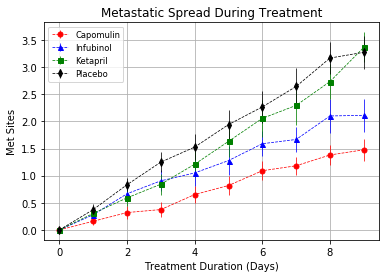

In [42]:
# Generate the Plot (with Error Bars)
plt.errorbar(avg_ms_df.index, avg_ms_df["Capomulin"], yerr=se_ms_df["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.75)
plt.errorbar(avg_ms_df.index, avg_ms_df["Infubinol"], yerr=se_ms_df["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.75)
plt.errorbar(avg_ms_df.index, avg_ms_df["Ketapril"], yerr=se_ms_df["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.75)
plt.errorbar(avg_ms_df.index, avg_ms_df["Placebo"], yerr=se_ms_df["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.75)
#Chart Title
plt.title("Metastatic Spread During Treatment")
#Set Y Axis Label
plt.ylabel("Met Sites")
#Set X Axis Label
plt.xlabel("Treatment Duration (Days)")
#Show Chart Grid Lines
plt.grid(True)
#Set to display legend with borders - Placement and Font Size 
plt.legend(loc="best", fontsize="small", fancybox=True)
# Save the Figure
plt.savefig("Charts/metastatic spread.png")

# Show the Figure


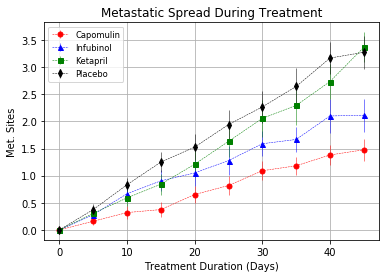

## Survival Rates

In [49]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = clinical_mouse_df.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count).reset_index()
mice_count_df = mice_count_df.rename(columns={"Tumor Volume (mm3)": "Mouse Count"}) 
# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [50]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_bydrug = mice_count_df.pivot(index="Timepoint", columns="Drug")["Mouse Count"]
# Preview the Data Frame
mice_count_bydrug.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


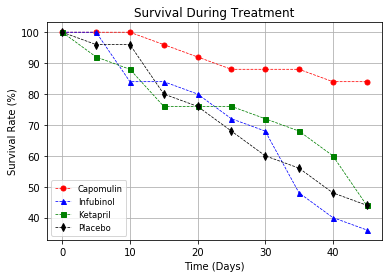

In [58]:
# Generate the Plot (Accounting for percentages)
plt.plot(mice_count_bydrug["Capomulin"]/.25, color="r", marker="o", linestyle="dashed", markersize=5, linewidth=0.75)
plt.plot(mice_count_bydrug["Infubinol"]/.25, color="b", marker="^", linestyle="dashed", markersize=5, linewidth=0.75)
plt.plot(mice_count_bydrug["Ketapril"]/.25, color="g", marker="s", linestyle="dashed", markersize=5, linewidth=0.75)
plt.plot(mice_count_bydrug["Placebo"]/.25, color="k", marker="d", linestyle="dashed", markersize=5, linewidth=0.75)
#Chart Title
plt.title("Survival During Treatment")
#Set Y Axis Label
plt.ylabel("Survival Rate (%)")
#Set X Axis Label
plt.xlabel("Time (Days)")
#Show Chart Grid Lines
plt.grid(True)
#Set to display legend with borders - Placement and Font Size 
plt.legend(loc="best", fontsize="small", fancybox=True)
# Save the Figure
plt.savefig("Charts/Treatment Survival Rate.png")
# Show the Figure
plt.show()

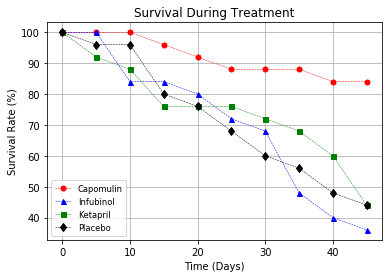

## Summary Bar Graph

In [64]:
# Calculate the percent changes for each drug
avg_tumor_delta = ((avg_timepoint_df.iloc[-1] - avg_timepoint_df.iloc[0]) / avg_timepoint_df.iloc[0])*100
se_tumor_delta = ((se_timepoint_df.iloc[-1] - se_timepoint_df.iloc[0]) / se_timepoint_df.iloc[0])*100

# Display the data to confirm
avg_tumor_delta

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [66]:
# Store all Relevant Percent Changes into a Tuple
all_deltas = (avg_tumor_delta["Capomulin"],
              avg_tumor_delta["Ceftamin"],
              avg_tumor_delta["Infubinol"],
              avg_tumor_delta["Ketapril"],
              avg_tumor_delta["Naftisol"],
              avg_tumor_delta["Placebo"],
              avg_tumor_delta["Propriva"],
              avg_tumor_delta["Ramicane"],
              avg_tumor_delta["Stelasyn"],
              avg_tumor_delta["Zoniferol"])

# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

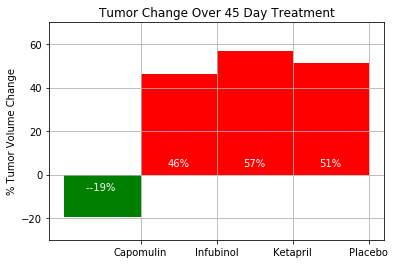